# Trabajo Práctico 1 
### Clasificación sobre datos simulados. 

## Introducción
Para este trabajo, hemos creado una función generadora de minions. Sobre cada minion, hemos medido 200 características que representan habilidades que poseen en distintas tareas (relacionadas al Mal).  

El doctor Nefario ha ideado una fórmula para determinar si un minion es o no apto para concretar su plan para conquistar el mundo. De esta manera ha etiquetado más de 500 minions. Lamentablemente, ha perdido dicha fórmula y necesita seguir decidiendo si nuevos minions son o no aptos para su macabro plan.

Es por esto que nuestro objetivo será construir clasificadores que estimen lo mejor posible la probabilidad de que nuevos minions sean o no aptos para concretar el plan de conquista y así facilitarle las cosas al doctor Nefario.

Por otra parte, ya que el doctor Nefario tuvo problemas con equipos que sobreestiman sus resultados, decidió guardarse varias etiquetas extra que no compartirá con nadie, y que luego utilizará para elegir al mejor equipo, al cual contratará para (de una vez por todas) conquistar el mundo. 


En concreto:

Tendrán disponible una matriz de datos $X$ de $500$ filas en donde cada fila $x^{(i)}$ representa un vector de $200$ características de cada instancia. Es decir, $\textbf{x}^{(i)} = x_1^{(i)}, \dots, x_{200}^{(i)}$ con $i$ entre $1$ y $500$. Además, tendrán y, un vector de $500$ posiciones con dos posibles valores: $True$ y $False$. 

Por otra parte, tendrán disponibles más instancias de evaluación $X_{competencia}$ sin las respectivas etiquetas que utilizaremos para evaluar sus resultados. 



In [65]:
# PREAMBULOS
%matplotlib inline

SEED = 1234

def warn(*args, **kwargs):
    pass
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn = warn

from IPython.display import display, HTML
from time import time

import numpy as np
np.set_printoptions(precision=4)
np.random.seed(SEED)

import pandas as  pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

pd.set_option('precision', 4)

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn.ensemble
import sklearn.naive_bayes
import sklearn.svm
import sklearn.metrics

import sklearn.model_selection
from scipy.stats import randint as sp_randint

In [66]:
# Carga de datos
X = pd.read_csv("X.csv", index_col="index")
y = pd.read_csv("y.csv", index_col="index", dtype=int)  # Cargamos los valores booleanos (True y False)
                                                        # como números (1 y 0) para facilitar el manejo luego. 
    
X_competencia = pd.read_csv("X_competencia1.csv", index_col="index")
y_competencia_ejemplo = pd.read_csv("y_competencia_ejemplo.csv", index_col="index")
display(X)
display(y)

# Descomentar si quieren ver los datos para la competencia:
# display(X_competencia) 
# display(y_competencia_ejemplo)

,0,1,2,3,4,5,6,...,193,194,195,196,197,198,199
index,,,,,,,,,,,,,,,
0,1.4914,0.1644,1.2315,1.2429,1.5576,0.0455,0.1302,...,-1.1983,-0.0118,1.5375,-0.7727,-0.1401,2.0871,-0.8312
1,-0.2749,0.2780,-1.3108,0.6801,-0.5503,0.6359,-0.4478,...,1.2190,-0.3190,-0.6446,-0.0061,-1.2374,-1.3291,-1.3265
2,-0.2243,-0.5710,-0.2712,-0.1328,-1.0045,0.9315,-1.4507,...,0.9459,0.1430,-0.1989,-0.0393,-0.5866,2.2507,1.4925
3,0.5853,-0.8532,-0.2723,-0.5493,-2.9824,-0.1697,-0.0430,...,1.6488,-0.7363,-0.8866,-1.2717,-0.1493,0.2007,-1.4820
4,-1.4155,1.4187,0.6027,-0.7993,0.2939,-0.1796,-0.7140,...,1.1314,-0.4230,-0.2685,0.3045,-1.2245,-1.9421,1.5186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.2516,0.9375,-1.1980,0.4577,0.9287,0.5373,0.2476,...,0.5829,-0.5494,0.4607,1.2182,0.1025,3.0034,-0.0344
496,0.6246,-1.0590,0.9491,0.2687,0.6610,-1.6657,0.3982,...,-0.1075,0.8993,-0.4229,0.3977,-0.0808,-1.7054,-0.4786
497,0.2677,0.1802,0.7154,0.3542,-0.9023,-1.7792,-0.0121,...,0.8491,0.7469,0.2071,-1.0090,0.3317,-1.7513,-0.5397


,output
index,
0,0
1,0
2,0
3,0
4,1
...,...
495,1
496,0
497,1


## Ejercicio 1

### Separación de datos

Contarán con una cantidad limitada de datos, por lo cual es importante tomar una buena decisión en el momento de empezar a utilizarlos. En este punto pedimos que evalúen cómo separar sus datos para desarrollo y para evaluación tomando en cuenta la competencia. 

X_dev: (400, 200), y_dev: (400, 1) para desarrollo
X_eval: (100, 200), y_eval: (100, 1) para evaluación


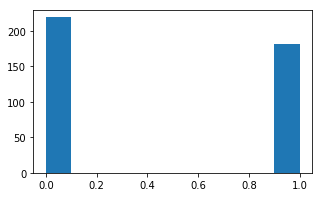

In [67]:
# EJERCICIO 1. 

np.random.seed(SEED)


########################################################
## AQUI VA SU CODIGO
X_dev, X_eval, y_dev, y_eval = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=SEED)  # cambiar esta línea si lo consideran necesario

# Objetivo: variables X_dev, X_eval, y_dev e y_eval asignadas
#########################################################


print("X_dev: {}, y_dev: {} para desarrollo".format(X_dev.shape, y_dev.shape))
print("X_eval: {}, y_eval: {} para evaluación".format(X_eval.shape, y_eval.shape))

plt.figure(figsize=(5, 3))
plt.hist(np.array(y_dev))  # muestra un histograma para la distribución de y.
plt.show()

## Ejercicio 2

### Construcción de modelos

Para este punto, la tarea consiste en construir y evaluar modelos de tipo árbol de decisión, de manera de obtener una estimación realista de la performance de los mismos. 

1. Entrenar un árbol de decisión con altura máxima 3 y el resto de los hiperparámetros en default. 
2. Estimar la performance del modelo utilizando K-fold cross validation con K = 5, con las métricas “Accuracy” y “ROC AUC”. Para ello, se pide medir la performance en cada partición tanto sobre el fold de validación como sobre los folds de entrenamiento. Luego, completar la primera tabla.
3. Entrenar árboles de decisión para cada una de las siguientes combinaciones y completar la segunda tabla.

----

**EJERCICIO EXTRA: Usar la implementación de árboles de decisión que realizaron para la guía de ejercicios de la materia. Adaptarla para que cumpla con la interfaz requerida por sklearn, asegurarse de que funcione con variables continuas y reproducir las tablas anteriores.   **

----

In [68]:
accuracies_training = []
accuracies_validation = []
aucs_training = []
aucs_validation = []

# Puede serles de utilidad tener a X_dev e y_dev como matrices de numpy directamente:
X_dev_np = np.array(X_dev)
y_dev_np = np.array(y_dev).ravel()

########################################################
## AQUI VA SU CODIGO 
tree_classifier = sklearn.tree.DecisionTreeClassifier(max_depth=3)

kf = sklearn.model_selection.KFold(n_splits=5,random_state=SEED)
splits = kf.split(X_dev_np)
for train_index, test_index in splits:
    X_train, X_test = X_dev_np[train_index], X_dev_np[test_index]
    y_train, y_test = y_dev_np[train_index], y_dev_np[test_index]
    tree_classifier.fit(X_train,y_train)
    
    accuracies_training.append(tree_classifier.score(X_train,y_train))
    
    accuracies_validation.append(tree_classifier.score(X_test,y_test))
    
    y_scores = tree_classifier.predict_proba(X_train)[:,1]
    
    aucs_training.append(sklearn.metrics.roc_auc_score(y_train,y_scores))
    
    y_scores = tree_classifier.predict_proba(X_test)[:,1]
    
    aucs_validation.append(sklearn.metrics.roc_auc_score(y_test,y_scores))

## Objetivo: accuracies_training, accuracies_validation, aucs_training y aucs_validation asignados
#########################################################

df = pd.DataFrame(index=range(1,6))
df.index.name = "Permutación"
                  
df["Accuracy (training)"] = accuracies_training     # cambiar por accuracies_training
df["Accuracy (validación)"] = accuracies_validation   # cambiar por accuracies_validation
df["AUC ROC (training)"] = aucs_training      # cambiar por aucs_training
df["AUC ROC (validación)"] = aucs_validation    # cambiar por aucs_validation


display(HTML("<h3> TABLA 1 </h3>"))
display(df)

# Descomentar las siguientes líneas para graficar el resultado
# df.plot(kind="bar")
# plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
# plt.show()

,Accuracy (training),Accuracy (validación),AUC ROC (training),AUC ROC (validación)
Permutación,,,,
1,0.8031,0.5875,0.8845,0.5870
2,0.8500,0.6250,0.8813,0.6512
3,0.8187,0.6125,0.8810,0.5918
4,0.8281,0.7375,0.8618,0.7596
5,0.8094,0.5750,0.8656,0.5954


In [69]:
resultados_training = []
resultados_validation = []


########################################################
## AQUI VA SU CODIGO 
## Objetivo: resultados_training y resultados_validation asignadas
#
## Recomendamos seguir el siguiente esquema:
np.random.seed(SEED)
for criterio in ["gini", "entropy"]:
    for altura in [3, 5, None]:
        
        aucs_training = []
        aucs_validation = []
        clf = sklearn.tree.DecisionTreeClassifier(max_depth=altura,criterion=criterio)
        kf = sklearn.model_selection.KFold(n_splits=5,random_state=SEED)
        splits = kf.split(X_dev_np)
        for train_index, test_index in splits:
            X_train, X_test = X_dev_np[train_index], X_dev_np[test_index]
            y_train, y_test = y_dev_np[train_index], y_dev_np[test_index]
            clf.fit(X_train,y_train)

            y_scores = clf.predict_proba(X_train)[:,1]

            aucs_training.append(sklearn.metrics.roc_auc_score(y_train,y_scores))

            y_scores = clf.predict_proba(X_test)[:,1]

            aucs_validation.append(sklearn.metrics.roc_auc_score(y_test,y_scores))
        
        resultados_training.append( np.mean(aucs_training) )
        resultados_validation.append( np.mean(aucs_validation) )
#########################################################

df = pd.DataFrame(index=range(0,6))

df["Altura máxima"] = [3, 5, "Inifinito"] * 2
df["Criterio de evaluación de corte"] = ["Gini"] * 3 + ["Ganancia de Información"] * 3
df["AUC ROC promedio (training)"] = resultados_training # reemplazar por resultados_training
df["AUC ROC promedio (validación)"] = resultados_validation # reemplazar por resultados_validation

   
display(HTML("<h3> TABLA 2 </h3>"))
display(df)

,Altura máxima,Criterio de evaluación de corte,AUC ROC promedio (training),AUC ROC promedio (validación)
0,3,Gini,0.8749,0.6370
1,5,Gini,0.9714,0.6160
2,Inifinito,Gini,1.0000,0.6108
3,3,Ganancia de Información,0.8766,0.6465
4,5,Ganancia de Información,0.9757,0.6890
5,Inifinito,Ganancia de Información,1.0000,0.6733


## Implementación de Árbol de Decisión

In [70]:
from collections import Counter
import math

# Esta es la implementación de árbol de decisión para el ejercicio extra

def construir_arbol(instancias, etiquetas, depth=3, criterion="gini"):
    # ALGORITMO RECURSIVO para construcción de un árbol de decisión binario. 
    print("profundidad: " + str(depth))
    print("criterio: " + criterion)
    
    # Suponemos que estamos parados en la raiz del árbol y tenemos que decidir cómo construirlo. 
    ganancia, pregunta = encontrar_mejor_atributo_y_corte(instancias, etiquetas, criterion)
    
    # Criterio de corte: ¿Hay ganancia?
    if ganancia == 0 or ((not depth is None) and depth<=1):
        #  Si no hay ganancia en separar, no separamos. 
        return Hoja(etiquetas)
    else: 
        # Si hay ganancia en partir el conjunto en 2
        instancias_cumplen, etiquetas_cumplen, instancias_no_cumplen, etiquetas_no_cumplen = partir_segun(pregunta, instancias, etiquetas)
        # partir devuelve instancias y etiquetas que caen en cada rama (izquierda y derecha)

        # Paso recursivo (consultar con el computador más cercano)        
        sub_arbol_izquierdo = construir_arbol(instancias_cumplen, etiquetas_cumplen, depth-1 if not depth is None else None, criterion)
        sub_arbol_derecho   = construir_arbol(instancias_no_cumplen, etiquetas_no_cumplen, depth-1 if not depth is None else None, criterion)
        # los pasos anteriores crean todo lo que necesitemos de sub-árbol izquierdo y sub-árbol derecho
        
        # sólo falta conectarlos con un nodo de decisión:
        return Nodo_De_Decision(pregunta, sub_arbol_izquierdo, sub_arbol_derecho)

# Definición de la estructura del árbol. 
class Hoja:
    #  Contiene las cuentas para cada clase (en forma de diccionario)
    #  Por ejemplo, {'Si': 2, 'No': 2}
    def __init__(self, etiquetas):
        self.cuentas = dict(Counter(etiquetas))


class Nodo_De_Decision:
    # Un Nodo de Decisión contiene preguntas y una referencia al sub-árbol izquierdo y al sub-árbol derecho
     
    def __init__(self, pregunta, sub_arbol_izquierdo, sub_arbol_derecho):
        self.pregunta = pregunta
        self.sub_arbol_izquierdo = sub_arbol_izquierdo
        self.sub_arbol_derecho = sub_arbol_derecho
        
        
# Definición de la clase "Pregunta"
class Pregunta:
    def __init__(self, atributo, valor):
        self.atributo = atributo
        self.valor = valor
    
    def cumple(self, instancia):
        # Devuelve verdadero si la instancia cumple con la pregunta
        if isinstance(self.valor, int) or isinstance(self.valor, float):
            return instancia[self.atributo] <= self.valor
        else:
            return instancia[self.atributo] == self.valor
    
    def __repr__(self):
        return "¿Es el valor para {} (menor o) igual a {}?".format(self.atributo, self.valor)

def gini(etiquetas):
    # COMPLETAR
    sies = etiquetas.count(1)
    
    if len(etiquetas) > 0:
        proba_si = sies/float(len(etiquetas))
    else:
        return 0.5
    proba_no = 1-proba_si
    
    return 1 - proba_si ** 2 - proba_no ** 2
    

def ganancia_gini(instancias, etiquetas_rama_izquierda, etiquetas_rama_derecha):
    # COMPLETAR
    gini_izq = gini(etiquetas_rama_izquierda)
    gini_der = gini(etiquetas_rama_derecha)
    
    etiquetas = etiquetas_rama_izquierda + etiquetas_rama_derecha
    gini_inicial = gini(etiquetas)
    
    gini_ponderado = len(etiquetas_rama_izquierda)/float(len(etiquetas)) * gini_izq + len(etiquetas_rama_derecha)/float(len(etiquetas)) * gini_der
    
    ganancia_gini = gini_inicial - gini_ponderado
    return ganancia_gini

def entropia(etiquetas):
    # COMPLETAR
    sies = etiquetas.count(1)
    
    if len(etiquetas) > 0:
        proba_si = sies/float(len(etiquetas))
    else:
        return 0.5
    proba_no = 1-proba_si
    
    if proba_si == 0:
        return - proba_no * math.log2(proba_no)
    elif proba_no == 0:
        return - proba_si * math.log2(proba_si)
    else:
        return -proba_si * math.log2(proba_si) - proba_no * math.log2(proba_no)


def ganancia_entropia(instancias, etiquetas_rama_izquierda, etiquetas_rama_derecha):
    # COMPLETAR
    entropia_izq = entropia(etiquetas_rama_izquierda)
    entropia_der = entropia(etiquetas_rama_derecha)
    
    etiquetas = etiquetas_rama_izquierda + etiquetas_rama_derecha
    entropia_inicial = entropia(etiquetas)
    
    entropia_ponderada = len(etiquetas_rama_izquierda)/float(len(etiquetas)) * entropia_izq + len(etiquetas_rama_derecha)/float(len(etiquetas)) * entropia_der
    
    ganancia = entropia_inicial - entropia_ponderada
    return ganancia


def partir_segun(pregunta, instancias, etiquetas):
    # Esta función debe separar instancias y etiquetas según si cada instancia cumple o no con la pregunta (ver método 'cumple')
    # COMPLETAR (recomendamos utilizar máscaras para este punto)

    #df_filtered = df[df['column'] == value]
    
    instancias_cumplen = instancias.where(pregunta.cumple(instancias)).dropna()    
    instancias_no_cumplen = instancias.mask(pregunta.cumple(instancias)).dropna()    
        
    indices_cumplen = list(instancias_cumplen.index)
    
    etiquetas_cumplen = [etiquetas[i] for i in indices_cumplen]
        
    indices_no_cumplen = list(filter(lambda x: x not in indices_cumplen, range(len(etiquetas))))
    
    etiquetas_no_cumplen = [etiquetas[i] for i in indices_no_cumplen]
    
    #instancias_cumplen, etiquetas_cumplen, instancias_no_cumplen, etiquetas_no_cumplen = ['Si'], ['Si'], ['Si'], ['Si']
    return instancias_cumplen.reset_index(drop=True), etiquetas_cumplen, instancias_no_cumplen.reset_index(drop=True), etiquetas_no_cumplen

def encontrar_mejor_atributo_y_corte(instancias, etiquetas, criterio):
    import datetime
    max_ganancia = 0
    mejor_pregunta = None
    for columna in instancias.columns:
        if (columna % 50 == 0):
            print('Estamos en la columna:')
            print(columna)
        for valor in set(instancias[columna]):
            # Probando corte para atributo y valor
            pregunta = Pregunta(columna, valor)
            _, etiquetas_rama_izquierda, _, etiquetas_rama_derecha = partir_segun(pregunta, instancias, etiquetas)
            #print(f"{etiquetas} \n {etiquetas_rama_izquierda} {etiquetas_rama_derecha}")
            if criterio == "gini":
                ganancia = ganancia_gini(instancias, etiquetas_rama_izquierda, etiquetas_rama_derecha)
            else:
                ganancia = ganancia_entropia(instancias, etiquetas_rama_izquierda, etiquetas_rama_derecha)
            if ganancia > max_ganancia:
                max_ganancia = ganancia
                mejor_pregunta = pregunta
            
    return max_ganancia, mejor_pregunta


def imprimir_arbol(arbol, spacing=""):
    if isinstance(arbol, Hoja):
        print (spacing + "Hoja:", arbol.cuentas)
        return

    print (spacing + str(arbol.pregunta))

    print (spacing + '--> True:')
    imprimir_arbol(arbol.sub_arbol_izquierdo, spacing + "  ")

    print (spacing + '--> False:')
    imprimir_arbol(arbol.sub_arbol_derecho, spacing + "  ")


# ## Parte 2 (opcional)
# Protocolo sklearn para clasificadores. Completar el protocolo requerido por sklearn. Deben completar la función predict utilizando el árbol para predecir valores de nuevas instancias. 
# 

def predecir(arbol, x_t):
    # COMPLETAR
    while True:
        
        if isinstance(arbol,Hoja):
            if arbol.cuentas.get(1,0) > arbol.cuentas.get(0,0):
                return 1
            else:
                return 0
        if arbol.pregunta.cumple(x_t):
            arbol = arbol.sub_arbol_izquierdo
        else:
            arbol = arbol.sub_arbol_derecho
        
    return 1

def predecir_proba(arbol, x_t):
    # COMPLETAR
    while True:
        
        if isinstance(arbol,Hoja):
            sies = arbol.cuentas.get(1,0)
            noes = arbol.cuentas.get(0,0)
            #print(arbol.cuentas)
            #print("Sies: " + str(sies))
            #print("Noes: " + str(noes))
            return sies/float(sies + noes)
        if arbol.pregunta.cumple(x_t):
            arbol = arbol.sub_arbol_izquierdo
        else:
            arbol = arbol.sub_arbol_derecho
        
    return 1

# class Nodo_De_Decision:
#     # Un Nodo de Decisión contiene preguntas y una referencia al sub-árbol izquierdo y al sub-árbol derecho
     
#     def __init__(self, pregunta, sub_arbol_izquierdo, sub_arbol_derecho):
#         self.pregunta = pregunta
#         self.sub_arbol_izquierdo = sub_arbol_izquierdo
#         self.sub_arbol_derecho = sub_arbol_derecho


class MiClasificadorArbol(): 
    def __init__(self, depth=3, criterion="gini"):
        self.arbol = None
        self.columnas = None
        self.depth = depth
        self.criterion = criterion
    
    def fit(self, X_train, y_train):
        self.arbol = construir_arbol(pd.DataFrame(X_train), y_train, depth=self.depth, criterion=self.criterion)
        return self
    
    def predict(self, X_test):
        predictions = []
        for x_t in X_test:
            x_t_df = pd.DataFrame([x_t]).iloc[0]
            prediction = predecir(self.arbol, x_t_df) 
            #print(x_t, "predicción ->", prediction)
            predictions.append(prediction)
        return predictions
    
    def predict_proba(self,X_test):
        predictions = []

        for x_t in X_test:
            x_t_df = pd.DataFrame([x_t]).iloc[0]
            prediction = predecir_proba(self.arbol, x_t_df)            
            predictions.append([1-prediction,prediction])
        return np.array(predictions)
            
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        
        accuracy = sum(y_i == y_j for (y_i, y_j) in zip(y_pred, y_test)) / len(y_test)
        return accuracy

### Tabla 1 para nuestro árbol
(scrollear hasta el final del output)  
Warning: tarda 2 horas en correr

In [35]:
accuracies_training = []
accuracies_validation = []
aucs_training = []
aucs_validation = []

#######################################################
# AQUI VA SU CODIGO 
tree_classifier = MiClasificadorArbol(depth=3)

kf = sklearn.model_selection.KFold(n_splits=5,random_state=SEED)
splits = kf.split(X_dev_np)

fold_number = 1
for train_index, test_index in splits:
    
    print('fold ' + str(fold_number))
    fold_number += 1
    
    X_train, X_test = X_dev_np[train_index], X_dev_np[test_index]
    y_train, y_test = y_dev_np[train_index], y_dev_np[test_index]
    tree_classifier.fit(X_train,y_train)
    
    accuracies_training.append(tree_classifier.score(X_train,y_train))
    
    accuracies_validation.append(tree_classifier.score(X_test,y_test))
    
    y_scores = tree_classifier.predict_proba(X_train)[:,1]
    
    aucs_training.append(sklearn.metrics.roc_auc_score(y_train,y_scores))
    
    y_scores = tree_classifier.predict_proba(X_test)[:,1]
    
    aucs_validation.append(sklearn.metrics.roc_auc_score(y_test,y_scores))
    

## Objetivo: accuracies_training, accuracies_validation, aucs_training y aucs_validation asignados
#########################################################

df = pd.DataFrame(index=range(1,6))
df.index.name = "Permutación"
                  
df["Accuracy (training)"] = accuracies_training     # cambiar por accuracies_training
df["Accuracy (validación)"] = accuracies_validation   # cambiar por accuracies_validation
df["AUC ROC (training)"] = aucs_training      # cambiar por aucs_training
df["AUC ROC (validación)"] = aucs_validation    # cambiar por aucs_validation


display(HTML("<h3> TABLA 1 </h3>"))
display(df)

fold 1
profundidad: 3
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
fold 2
profundidad: 3
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
Estamos en 

,Accuracy (training),Accuracy (validación),AUC ROC (training),AUC ROC (validación)
Permutación,,,,
1,0.7594,0.5750,0.8223,0.5898
2,0.7562,0.6000,0.8285,0.6640
3,0.7625,0.6625,0.8224,0.6320
4,0.7500,0.7500,0.8013,0.7769
5,0.7656,0.5875,0.8061,0.6939


### Tabla 2 para nuestro árbol  
(scrollear hasta abajo para ver el output)  
Warning: tarda 8 horas y media en correr

In [7]:
resultados_training = []
resultados_validation = []

# Decidimos reducir la cantidad de datos, para que la cantidad de tiempo corriendo sea manejable
tree_X_dev, _, tree_y_dev, _ = sklearn.model_selection.train_test_split(X_dev, y_dev, test_size=0.5, random_state=SEED)
tree_X_dev_np = np.array(tree_X_dev)
tree_y_dev_np = np.array(tree_y_dev).ravel()

np.random.seed(SEED)
for criterio in ["gini","entropy"]:
    for altura in [3, 5, None]:
        
        aucs_training = []
        aucs_validation = []
        clf =  MiClasificadorArbol(depth=altura, criterion=criterio)
        kf = sklearn.model_selection.KFold(n_splits=5,random_state=SEED)
        splits = kf.split(tree_X_dev_np)
        for train_index, test_index in splits:
            X_train, X_test = tree_X_dev_np[train_index], tree_X_dev_np[test_index]
            y_train, y_test = tree_y_dev_np[train_index], tree_y_dev_np[test_index]
            clf.fit(X_train,y_train)

            y_scores = clf.predict_proba(X_train)[:,1]

            aucs_training.append(sklearn.metrics.roc_auc_score(y_train,y_scores))

            y_scores = clf.predict_proba(X_test)[:,1]

            aucs_validation.append(sklearn.metrics.roc_auc_score(y_test,y_scores))
        
        resultados_training.append( np.mean(aucs_training) )
        resultados_validation.append( np.mean(aucs_validation) )
#########################################################

df = pd.DataFrame(index=range(0,6))

df["Altura máxima"] = [3, 5, "Inifinito"] * 2
df["Criterio de evaluación de corte"] = ["Gini"] * 3 + ["Ganancia de Información"] * 3
df["AUC ROC promedio (training)"] = resultados_training # reemplazar por resultados_training
df["AUC ROC promedio (validación)"] = resultados_validation # reemplazar por resultados_validation

   
display(HTML("<h3> TABLA 2 </h3>"))
display(df)

profundidad: 3
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 3
criterio: gini
Estamos en la columna:
0


Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 3
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 4
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 3
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gin

Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 5
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 4
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 3
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
p

Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profund

Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos 

Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: gini
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profund

Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 4
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 3
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos 

Estamos en la columna:
150
profundidad: 3
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 2
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 1
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profund

Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la

profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: 

Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la columna:
50
Estamos en la columna:
100
Estamos en la columna:
150
profundidad: None
criterio: entropy
Estamos en la columna:
0
Estamos en la

,Altura máxima,Criterio de evaluación de corte,AUC ROC promedio (training),AUC ROC promedio (validación)
0,3,Gini,0.8570,0.7621
1,5,Gini,0.9844,0.6432
2,Inifinito,Gini,1.0000,0.6734
3,3,Ganancia de Información,0.8543,0.7647
4,5,Ganancia de Información,0.9824,0.7491
5,Inifinito,Ganancia de Información,1.0000,0.6870


## Ejercicio 3: Comparación de algoritmos


Se pide explorar distintas combinaciones de algoritmos de aprendizaje e hiperparámetros, de manera de buscar una performance óptima. Para este ejercicio es necesario que evalúen posibilidades utilizando la técnica de Grid Search. Como métrica de performance, usar siempre el área bajo la curva (AUC ROC) resultante de 5-fold cross-validation. 

Algoritmos a probar: KNN, árboles de decisión, LDA, Naive Bayes y SVM. Hiperparámetros: Revisar la documentación de cada uno para la búsqueda de combinaciones prometedoras.  

Se pide generar un reporte que contenga: 

1. Una descripción de las distintas combinaciones consideradas y su performance asociada (las que consideren relevantes, con al menos la mejor combinación para cada algoritmo). 

1. Una breve explicación de los factores que creen que produjeron dicho resultado. 

En este punto evaluaremos tanto los hiperparámetros elegidos como las conclusiones relacionadas a por qué piensan que ciertos algoritmos funcionan mejor que otros para estos datos. 



----

**EJERCICIO EXTRA**: Utilizar RandomizedSearchCV con rangos de parámetros que contengan a los utilizados en el GridSearch. Analizar si se encontraron mejores combinaciones de parámetros que no hayan sido tenidas en cuenta con el GridSearch y cuál fue la diferencia de tiempo de ejecución. 

----

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def top_resultados(grid, top=5):
    ## Si quieren, pueden utilizar esta función para imprimir las mejores combinaciones de su grid
    print("Top {} combinaciones".format(top))
    df = pd.DataFrame(grid.cv_results_["params"])
    df["mean_score_validation"] = grid.cv_results_["mean_test_score"]
    df["mean_score_training"] = grid.cv_results_["mean_train_score"]
    display(df.sort_values(by="mean_score_validation", ascending=False).head(top))

In [20]:
# #################### KNN ################################
knn = KNeighborsClassifier()
#knn_GSParams = {'n_neighbors':[x for x in range(1,200) if x%5 == 0 or x == 1],'weights':['uniform','distance']}
# Con la grid search de arriba, observamos que los mejores resultados son con n = 60, 55 y 65, por ende refinamos la busqueda
knn_GSParams = {'n_neighbors':[x for x in range(50,80)],'weights':['uniform','distance']}
knn_grid = GridSearchCV(knn,knn_GSParams,scoring='roc_auc',cv=5)
knn_grid.fit(X_dev_np,y_dev_np)
top_resultados(knn_grid)
#la mejor combinacion da n = 60 y usando weights='distance'

Top 5 combinaciones


,n_neighbors,weights,mean_score_validation,mean_score_training
21,60,distance,0.8573,1.0000
19,59,distance,0.8567,1.0000
15,57,distance,0.8563,1.0000
20,60,uniform,0.8561,0.8615
13,56,distance,0.8557,1.0000


In [42]:
###################### SVM #################################
svc = LinearSVC(random_state=SEED)
#svc_GSParams = {'C':[0.001,0.01,0.1,1,10,100],'multi_class':['ovr','crammer_singer']}
# Los mejores resultados dan con C = 0.001, exploramos ese rango mas en detalle
svc_GSParams = {'C':[x * 0.0001 for x in range(1, 150)]}
svc_grid = GridSearchCV(svc,svc_GSParams,scoring='roc_auc',cv=5)
svc_grid.fit(X_dev_np,y_dev_np)
top_resultados(svc_grid)
#la mejor combinacion da C = 0.0011

Top 5 combinaciones


,C,mean_score_validation,mean_score_training
10,0.0011,0.8644,0.9670
9,0.0010,0.8643,0.9641
8,0.0009,0.8643,0.9611
11,0.0012,0.8642,0.9694
7,0.0008,0.8637,0.9576


In [23]:
###################### LDA #################################
lda = LinearDiscriminantAnalysis()
lda_GSParams = {'solver':['svd','lsqr','eigen'], 'tol':[x * 0.0001 for x in range(1, 150)]}
lda_grid = GridSearchCV(lda,lda_GSParams,scoring='roc_auc',cv=5)
lda_grid.fit(X_dev_np,y_dev_np)
top_resultados(lda_grid)
#la mejor combinacion da tol = 0.0001 y solver = svd

Top 5 combinaciones


,solver,tol,mean_score_validation,mean_score_training
0,svd,0.0001,0.735,0.9986
294,lsqr,0.0146,0.735,0.9986
305,eigen,0.0008,0.735,0.9986
304,eigen,0.0007,0.735,0.9986
303,eigen,0.0006,0.735,0.9986


In [24]:
###################### DecTree #############################
dtc = DecisionTreeClassifier()
dtc_GSParams = {'criterion':['gini', 'entropy'], 'max_depth':[x for x in range(3, 100)]}
dtc_grid = GridSearchCV(dtc,dtc_GSParams,scoring='roc_auc',cv=5)
dtc_grid.fit(X_dev_np,y_dev_np)
top_resultados(dtc_grid)
#la mejor combinacion da con criterion=entropy y max_depth=4

Top 5 combinaciones


,criterion,max_depth,mean_score_validation,mean_score_training
98,entropy,4,0.7080,0.9385
97,entropy,3,0.6856,0.8765
99,entropy,5,0.6844,0.9796
176,entropy,82,0.6742,1.0000
155,entropy,61,0.6716,1.0000


In [27]:
###################### Naive Bayes #########################
from sklearn.model_selection import cross_validate

nbayes = GaussianNB()
#nbayes_GSParams = {'var_smoothing':[0.0000000001 * x for x in range(1, 50)]}
#nbayes_grid = GridSearchCV(nbayes,nbayes_GSParams,scoring='roc_auc',cv=5)
cv_data = cross_validate(nbayes,X_dev,y_dev,scoring='roc_auc',cv=5)
print("Test score: " + str(np.mean(cv_data['test_score'])))
print("Train score: " + str(np.mean(cv_data['train_score'])))
#nbayes_grid.fit(X_dev_np,y_dev_np)
#top_resultados(nbayes_grid)

Test score: 0.8377156225993436
Train score: 0.8738490844404637


### Conclusiones Grid Search

#### KNN

Cuatro de los cinco mejores resultados utilizaron "distance" en el hiperparámetro "weights", lo cual para nosotros tiene sentido, puesto que pareciera razonable darle más peso a los puntos que están más cercanos (A pesar de que no poseemos conocimiento del dominio(ns)).  
El rango para el parámetro n en los 5 mejores resultados está entre 56 y 60 sin variaciones grandes en el AUC ROC, por lo tanto pareciera que para los datos que nos fueron dados, usar un n en ese rango es apropiado.

#### SVM

El único parámetro que a nuestro criterio tenía sentido explorar era C. Los resultados muestran que el valor óptimo ronda alrededor de 0.001.

#### LDA

Podemos ver que no importa que "solver" usamos, los resultados parecen ser los mismos para este problema. Notar que el parámetro "tol" sólo se usa con el "solver" "svd", por lo que no pareciera ser muy relevante.

#### Árbol de decisión

En este caso, pareciera que el criterio de la entropia es superior a la ganancia gini, tal como vimos en clase. Otra cosa interesante para ver es la columna de mean_score_training, en donde se puede apreciar que árboles con mayor profundidad parecieran estar "overfitteando". 

#### Naive Bayes

A nuestro criterio, este modelo no tiene hiperparámetros que valga la pena explorar para este problema.

## Random Search

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [28]:
######################### KNN #################################
knn = KNeighborsClassifier()
knn_GSParams = {'n_neighbors':[x for x in range(1,300)],'weights':['uniform','distance']}
knn_random = RandomizedSearchCV(knn,knn_GSParams,scoring='roc_auc', n_iter=100,cv=5, random_state=SEED)
knn_random.fit(X_dev_np,y_dev_np)
top_resultados(knn_random)
#la mejor combinacion da n = 57 y usando weights='distance'
#dio validation=0.8563 y training=1.0000

Top 5 combinaciones


,n_neighbors,weights,mean_score_validation,mean_score_training
87,57,distance,0.8563,1.000
19,57,uniform,0.8548,0.862
58,61,distance,0.8543,1.000
83,39,distance,0.8515,1.000
8,66,distance,0.8509,1.000


In [43]:
########################## SVC ##################################
svc = LinearSVC(random_state=SEED)
svc_GSParams = {'C':[x * 0.00001 for x in range(1, 1500)]}
svc_random = RandomizedSearchCV(svc,svc_GSParams,scoring='roc_auc',n_iter=300,cv=5,random_state=SEED)
svc_random.fit(X_dev_np,y_dev_np)
top_resultados(svc_random)
#la mejor combinacion da C = 0.0010 y usando multi_class='ovr'
#dio validation=0.8647 y training=0.9628

Top 5 combinaciones


,C,mean_score_validation,mean_score_training
43,0.0011,0.8644,0.9673
164,0.0009,0.8644,0.9615
150,0.0009,0.8644,0.9600
82,0.0011,0.8643,0.9681
296,0.0009,0.8643,0.9611


In [30]:
############################ LDA ###############################
lda = LinearDiscriminantAnalysis()
lda_GSParams = {'solver':['svd','lsqr','eigen'], 'tol':[x * 0.00001 for x in range(1, 1500)]}
lda_random = RandomizedSearchCV(lda,lda_GSParams,scoring='roc_auc',n_iter=300,cv=5,random_state=SEED)
lda_random.fit(X_dev_np,y_dev_np)
top_resultados(lda_random)
# #la mejor combinacion da solver=lsqr y tol=0.0025
# #dio validation=0.735 y training=0.9986

Top 5 combinaciones


,solver,tol,mean_score_validation,mean_score_training
0,lsqr,0.0025,0.735,0.9986
206,lsqr,0.0128,0.735,0.9986
204,lsqr,0.0148,0.735,0.9986
203,svd,0.0017,0.735,0.9986
202,lsqr,0.0132,0.735,0.9986


In [45]:
########################## DecTree #########################################
dtc = DecisionTreeClassifier()
dtc_GSParams = {'criterion':['gini', 'entropy'], 'max_depth':[x for x in range(1, 200)]}
dtc_random = RandomizedSearchCV(dtc,dtc_GSParams,scoring='roc_auc',n_iter=300,cv=5,random_state=SEED)
dtc_random.fit(X_dev_np,y_dev_np)
top_resultados(dtc_random)
#la mejor combinacion da con criterion=entropy y max_depth=4
#dio validation=0.7020 y training=1.0000

Top 5 combinaciones


,criterion,max_depth,mean_score_validation,mean_score_training
179,entropy,4,0.7020,0.9385
296,entropy,3,0.6846,0.8776
239,entropy,94,0.6832,1.0000
23,entropy,2,0.6793,0.8085
119,entropy,22,0.6778,1.0000


### Conclusiones

En general, Random Search encontró combinaciones de hiperparámetros idénticas o muy similares a las de Grid Search y nos permite explorar un rango más alto de valores en una cantidad similar de tiempo.

## Ejercicio 4: 
### Diagnóstico Sesgo-Varianza. 

En este punto, se pide inspeccionar dos de sus mejores modelos encontrados hasta ahora: el mejor modelo de tipo árbol de decisión y el mejor de tipo SVM. Para ello:

1. Graficar curvas de complejidad para cada modelo, variando la profundidad en el caso de árboles, y el hiperparámetro C en el caso de SVM. Diagnosticar cómo afectan al sesgo y a la varianza esos dos hiperparámetros.
2. Graficar curvas de aprendizaje para cada modelo. En base a estas curvas, sacar conclusiones sobre si los algoritmos parecen haber alcanzado su límite, o bien si aumentar la cantidad de datos debería ayudar.
3. Construir un modelo RandomForest con 200 árboles. Explorar para qué sirve el hiperparámetro max_features y cómo afecta a la performance del algoritmo mediante una curva de complejidad. Explicar por qué creen que se dieron los resultados obtenidos. Por último, graficar una curva de aprendizaje sobre los parámetros elegidos para determinar si sería útil o no conseguir más datos (usar  grid search para encontrar una buena combinación de parámetros).  


**Atención**: Tener en cuenta que debemos seguir utilizando ROC AUC como métrica para estas curvas.

**ver**: http://scikit-learn.org/stable/modules/learning_curve.html#learning-curve

----
**EJERCICIO EXTRA:** Utilizar RandomizedSearchCV para explorar la performance del algoritmo de Gradient Boosting y comparar con los resultados obtenidos en el punto (c).


----




### Curvas de Complejidad

#### Árbol de decisión

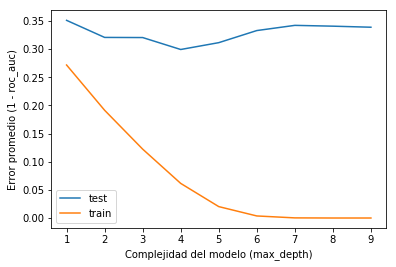

In [32]:
from sklearn.model_selection import cross_validate
#1 Curva de complejidad
test_error = []
train_error = []
n = 10
for d in range(1,n):
    dtc = DecisionTreeClassifier(max_depth=d,criterion='entropy')
    cv_data = cross_validate(dtc,X_dev,y_dev,scoring='roc_auc',cv=5)
    test_error.append(1-np.mean(cv_data['test_score']))
    train_error.append(1-np.mean(cv_data['train_score']))

plt.plot(list(range(1,n)),test_error,label='test')
plt.plot(list(range(1,n)),train_error,label='train')
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Complejidad del modelo (max_depth)")
plt.legend()
plt.show()

#### SVM

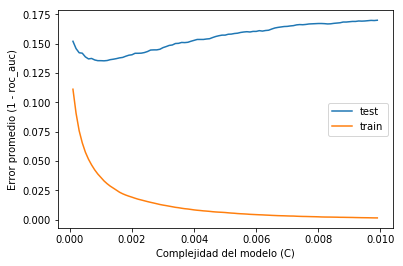

In [33]:
#1 curva de aprendizaje
test_error = []
train_error = []

Cs = [x * 0.0001 for x in range(1, 100)]

n = 10
for c in Cs:
    svc = LinearSVC(random_state=SEED, multi_class="ovr", C=c)
    cv_data = cross_validate(svc,X_dev,y_dev,scoring='roc_auc',cv=5)
    test_error.append(1-np.mean(cv_data['test_score']))
    train_error.append(1-np.mean(cv_data['train_score']))

plt.plot(Cs,test_error,label='test')
plt.plot(Cs,train_error,label='train')
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Complejidad del modelo (C)")
plt.legend()
plt.show()

## Conclusiones sobre sesgo/varianza en gráficos de curvas de complejidad
En el primer gráfico se observa como va variando el error en relación a la profundidad que se le admite al árbol. Este comienza siendo muy grande dado que con poca profundidad generaliza por demás los datos. Una vez que la altura del árbol va creciendo se va perdiendo generalización y ajustandose de mejor forma a los datos hasta llegar a la profundidad de 4 donde se observa el pico mínimo. Luego de este, al continuar creciendo su altura sobreespecifica sobre los datos de entrenamiento lo que trae aparejado un crecimiento en el error en los datos de test. La varianza en este modelo se va agrandando dado que el area entre las curva de entrenamiento va aumentando dado que mientras más altura se le permite al árbol más diferencia genera con las clasificaciones anteriores. Por el contrario el sesgo disminuye a medida que crece altura permitida del árbol dado que no se presenta errores casi en la clasificación de los datos de entrenamiento.

En el segundo gráfico se puede ver un compotamiento similar a medida que se incrementa el hiperparámetro C. Mientras más pequeño es el hiperparámetro C más especificidad se generará sobre los datos de entrenamiento (esto se puede observar que a partir del valor 0.0007 el error generado sobre los datos de entrenamiento son nulos) lo que genera un mayor error sobre datos nuevos, en nuestro gráfico los de test. Esto genera nuevamente que la varianza de este modelo se vaya agrandando mientras que el sesgo va disminuyendo.


### Curvas de aprendizaje

#### Árbol de decisión

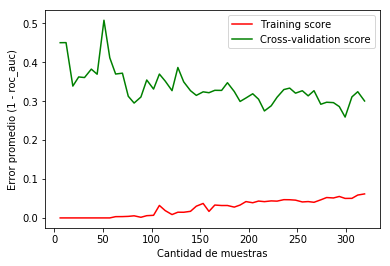

In [34]:
from sklearn.model_selection import learning_curve

dtc = DecisionTreeClassifier(max_depth=4,criterion='entropy')

train_sizes, train_scores, test_scores = learning_curve(dtc, X_dev, y_dev, cv=5, scoring="roc_auc", train_sizes=[x/50.0 for x in range(1, 51)])

train_scores_mean = 1 - np.mean(train_scores, axis=1)
test_scores_mean = 1 - np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Cantidad de muestras")
plt.legend()

#### SVM

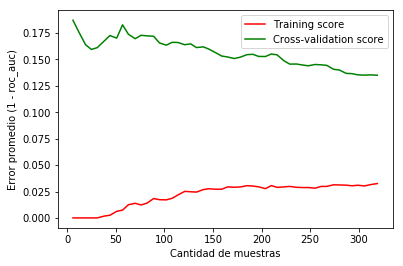

In [35]:
svc = LinearSVC(random_state=SEED, multi_class="ovr", C=0.0011)

train_sizes, train_scores, test_scores = learning_curve(svc, X_dev, y_dev, cv=5, scoring="roc_auc", train_sizes=[x/50.0 for x in range(1, 51)])

train_scores_mean = 1 - np.mean(train_scores, axis=1)
test_scores_mean = 1 - np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Cantidad de muestras")
plt.legend()

## Conclusiones sobre curvas de aprendizaje
Para la realización de estos gráficos se tomaron los mejores valores presentados por cada método en la etapa anterior. En el caso de árboles tomamos como altura máxima del árbol 4 y la entropía como criterio. Y en el caso de SVC tomamos como hiperparámetro C=0.0011 y ovr (one'vs'rest) como criterio para la separación de clases.

En ambos gráficos se puede observar un comportamiento similar. Mirando el score sobre el training se puede observar que el error cometido se va incrementando a medida que se agregan más datos y en el caso del cross validation ocurre lo opuesto, a medida que se incrementan los datos el resultado se vuelve más precisos. En ninguno de los gráficos pareciera verse que las curvas lleguen a estabilizarse, es decir presentar una pendiente casi nula o meseta, lo que puede sujerir que aportar nuevos datos aportaria en mejorar la presición del método.

## Random Forest

### Selección de hiperparámetros

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
# rfc_GSParams = {'max_depth':list(range(1,50))}
rfc_GSParams = {'max_depth':list(range(1,50)),'min_samples_split':list(range(2,10))}
rfc_grid = GridSearchCV(rfc,rfc_GSParams,scoring='roc_auc',cv=5)
rfc_grid.fit(X_dev,y_dev)
top_resultados(rfc_grid)
#los mejores parametros encontrados fueron max_depth=42 y min_samples_split=5

Top 5 combinaciones


,max_depth,min_samples_split,mean_score_validation,mean_score_training
89,12,3,0.8481,1.0
341,43,7,0.8470,1.0
178,23,4,0.8466,1.0
128,17,2,0.8460,1.0
75,10,5,0.8459,1.0


### Curvas de complejidad

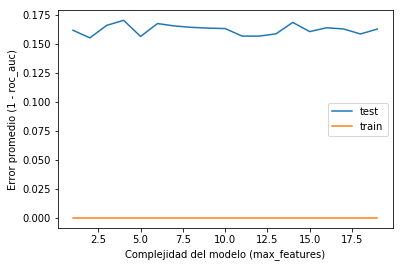

In [74]:
test_error = []
train_error = []
n = 20
for d in range(1,n):
    rfc = RandomForestClassifier(n_estimators=200,max_features=d,max_depth=12,min_samples_split=3)
    cv_data = cross_validate(rfc,X_dev_np,y_dev_np,scoring='roc_auc',cv=5)
    test_error.append(1-np.mean(cv_data['test_score']))
    train_error.append(1-np.mean(cv_data['train_score']))

plt.plot(list(range(1,n)),test_error,label='test')
plt.plot(list(range(1,n)),train_error,label='train')
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Complejidad del modelo (max_features)")
plt.legend()
plt.show()

In [13]:
### Conclusiones sobre el hiperparámetro max_features

En el gráfico se puede observar que la variación del error a medida que se incrementa el valor de max_features 
osila entre los valores 0.150 y 0.175 sin presentar una mejora significativa ni una pendiente de mejora. 
Su mínimo se alcanza al rededor del valor 5. Esto se podría deber a que no hay una combinación de atributos que 
mejor considerablemente la clasificación de los minions. Por esto cualquier subconjunto de atributos que se tome 
da una clasificación similar. 

SyntaxError: invalid syntax (<ipython-input-13-d430b34fbe55>, line 3)

### Curvas de aprendizaje

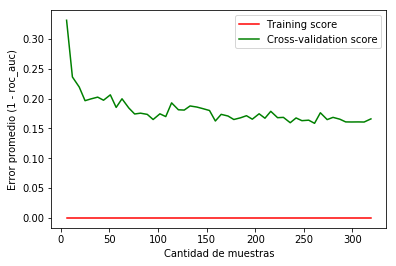

In [76]:
rfc = RandomForestClassifier(n_estimators=200,max_features=9,max_depth=42,min_samples_split=5)

train_sizes, train_scores, test_scores = learning_curve(rfc, X_dev_np, y_dev_np, cv=5, scoring="roc_auc", train_sizes=[x/50.0 for x in range(1, 51)])

train_scores_mean = 1 - np.mean(train_scores, axis=1)
test_scores_mean = 1 - np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Cantidad de muestras")
plt.legend()

In [14]:
### Conclusiones sobre la curva de aprendizaje

En el gráfico se puede observar que luega de una abrupta pendiente al principo, la línea correspondiente a validación
comienza a osilar entre los valores de 0.20 a 0.15 desde las 50 muestras hasta las 300 lo que no nos brinda indicio 
de que agregando mayores datos el comportamiento de método vaya a verse modificado.


SyntaxError: invalid syntax (<ipython-input-14-cfec07ff13ef>, line 3)

## Gradient Boosting

### Random Search

In [60]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier()

random_search_params = {'learning_rate' : [0.005 * x for x in range(1,100)],
                        'n_estimators' : [200, 250,300, 500, 1000, 1500],
                        'subsample' : [0.5, 0.8, 1],
                        'loss' : ['deviance', 'exponential'],
                        }

randomSearch = RandomizedSearchCV(gbc,random_search_params,scoring='roc_auc',n_iter=300,random_state=SEED,verbose=1,cv=3)
randomSearch.fit(X_dev_np,y_dev_np)
top_resultados(randomSearch)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 11.1min finished


Top 5 combinaciones


,learning_rate,loss,n_estimators,subsample,mean_score_validation,mean_score_training
94,0.055,deviance,500,0.5,0.8394,1.0
46,0.110,deviance,1000,0.5,0.8390,1.0
97,0.155,deviance,200,0.5,0.8377,1.0
240,0.165,deviance,300,0.5,0.8368,1.0
70,0.080,deviance,1500,0.5,0.8366,1.0


### Curvas de aprendizaje

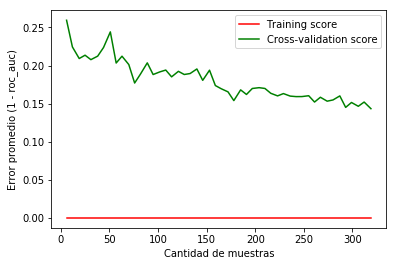

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
gbc = GradientBoostingClassifier(learning_rate=0.055,loss='deviance',n_estimators=500,subsample=0.5)
train_sizes, train_scores, test_scores = learning_curve(gbc, X_dev, y_dev, cv=5, scoring="roc_auc", train_sizes=[x/50.0 for x in range(1, 51)])

train_scores_mean = 1 - np.mean(train_scores, axis=1)
test_scores_mean = 1 - np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
plt.ylabel("Error promedio (1 - roc_auc)")
plt.xlabel("Cantidad de muestras")
plt.legend()


In [ ]:
### Comparación con el punto 4.3
Utilizando Gradiant Boosting se puede observar una curva decreciente en los datos de validación que puede indicar 
que si se agregaran más datos para entrenar al algoritmo este podría decrecentar aún más su error.

## Competencias

La entrega del trabajo estará acompañada de una competencia en la cual deberán poner a prueba su mejor modelo y sobre todo, su capacidad para estimar sus resultados. 

Su tarea será estimar la performance (AUC ROC) que tendrá su mejor modelo en datos de evaluación (X_competencia). 

Para ello, deberán predecir las probabilidades de las distintas instancias con su modelo, enviarnos dichas probabilidades junto a una estimación con 4 decimales de cuál será el AUC ROC resultante y calcularemos el resultado real. El grupo que consiga acercarse más al valor real, será el grupo ganador.  

Recomendamos no perder de vista esta competencia en el momento de separar los datos en los primeros puntos. 

Para esto, junto con la entrega del informe, deberán enviar un archivo en formato csv con las columnas “index” y “output” (ver ejemplo de archivo en: [y_competencia_ejemplo.csv](https://github.com/pbrusco/aa-notebooks/blob/master/TP1/y_competencia_ejemplo.csv)) y un valor esperado de AUC ROC. 


## Entrega
- Contarán con un esqueleto en formato Jupyter Notebook en donde tendrán que completar las celdas faltantes (ya sea con explicaciones y gráficos o código). 
- El notebook final deberá ser entregado en formatos .html e .ipynb. Es necesario que los resultados puedan reproducirse al ejecutar todas las celdas en orden (Kernel - Restart and Run All) utilizando las bibliotecas requeridas en el archivo: requirements.txt del repositorio. 
- Tienen tiempo hasta las 23:59hs del día miércoles 17/10/2018. La entrega se debe realizar a través del campus virtual y debe contener el informe.
- El trabajo deberá elaborarse en grupos de 3 personas.
- Se podrán pedir pruebas de integridad y autoría; es decir, verificar que la salida solicitada es fruto del modelo presentado y que el modelo fue construido según lo requerido en este enunciado.
- La evaluación será grupal y se basará en la calidad del informe (presentación, claridad, prolijidad); la originalidad, practicidad y coherencia técnica de la solución; la corrección y solidez de las pruebas realizadas.
- En el primer parcial se incluirá una pregunta sobre la solución entregada. Esa pregunta no influirá en la nota del parcial, pero sí en la nota individual del TP1.
- La participación en la competencia es obligatoria. De todas maneras, el resultado no incidirán en la nota de la materia.
- Los ejercicios extra son opcionales para aprobar el TP, pero son obligatorios para promocionar la materia.


## Competencia
Estimación del AUC ROC

In [78]:
rfc = RandomForestClassifier(n_estimators=200,max_features=d,max_depth=12,min_samples_split=3, random_state=SEED)
rfc.fit(X_dev_np, y_dev_np)

y_scores = rfc.predict_proba(X_eval)[:,1]

roc_auc = sklearn.metrics.roc_auc_score(y_eval,y_scores)
print(roc_auc)

0.811698717948718


### Guardado de resultados para la competencia

In [79]:
# Código para guardar los resultados de la competencia en un csv
import csv
valores_competencia = rfc.predict_proba(X_competencia)[:,1]

with open('y_competencia_nuestro.csv', 'w') as csvfile:
    fieldnames = ['index', 'output']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for i, out in zip(X_competencia.index, valores_competencia):
        writer.writerow({"index" : i, "output" : out})